In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/Colab Notebooks/Thesis/'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.tabular.data import *
from fastai.tabular.learner import *
from fastai.metrics import *

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
data = pd.read_csv(path + 'data2_sf.csv')
alist = data.columns.to_list()
alist

['city_id',
 'land_cover',
 'area',
 'city_pop',
 'population',
 'night',
 'cen_dist',
 'road_len',
 'X',
 'Y']

In [6]:
alist = ['population', 'night', 'road_len', 'city_pop', 'cen_dist', 'X', 'Y', 'land_cover', 'city_id']
data = data[alist]

In [7]:
data.shape

(191494, 9)

In [8]:
cat = alist[-2:]
cont = alist[1:-2]
y_names = alist[0]
procs = [Categorify,]

In [9]:
percent, length = 0.8, len(data.axes[0])
stop = int(percent * length)
valid_idx = list(range(stop,length))

In [10]:
dls = TabularDataLoaders.from_df(data, procs=procs, cat_names=cat, cont_names=cont,
                y_names=y_names, y_range=(-4,4), valid_idx=valid_idx, bs=8192, shuffle_train=True, device=device)

In [11]:
dls.show_batch()

,land_cover,city_id,night,road_len,city_pop,cen_dist,X,Y,population
0,7,7,-0.289290,-0.250437,0.137965,-0.301051,0.882186,-0.695692,-1.418824
1,7,9,-0.472719,0.086495,0.135639,-0.380956,1.002861,0.294105,-0.053854
2,7,17,-0.633720,0.041595,0.165630,-0.307096,0.578542,-0.031142,-0.791558
3,7,4,-0.557168,-1.167110,0.081236,-0.435730,-0.289247,1.774731,-1.259949
4,7,6,1.522876,-0.096436,0.087292,-1.396572,-1.389449,0.349059,-1.153685
5,7,8,-0.745974,0.249937,0.342413,0.969836,0.891330,0.998231,0.570041
6,7,12,0.107549,0.013228,1.000000,0.494004,-1.148285,-0.131554,-0.385070
7,8,17,-1.520807,0.435432,0.165630,1.987804,1.848275,1.078524,0.433946
8,7,8,-0.975763,0.354387,0.342413,1.024571,1.020184,0.596769,-0.627167
9,8,12,-0.329994,-0.064333,1.000000,0.923906,-1.332118,0.762137,-2.129464


In [12]:
# 2 Hidden Layers with 1000 and 500 activations
layers = [1000,500]
learn = tabular_learner(dls, layers=layers, loss_func=mse, metrics=mse)

In [13]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(12, 6)
    (1): Embedding(23, 9)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=21, out_features=1000, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1000, out_features=500, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=1, bias=True)
    )
  )
)

Learning rate is now 0.002290867641568184


epoch,train_loss,valid_loss,mse,time
0,0.458844,0.442708,0.442708,00:00
1,0.379386,0.375837,0.375837,00:00
2,0.339478,0.333780,0.333780,00:00
3,0.314444,0.309190,0.309190,00:00
4,0.297498,0.275046,0.275046,00:00
5,0.285472,0.261306,0.261306,00:00
6,0.277040,0.258024,0.258024,00:00
7,0.270619,0.256570,0.256570,00:00
8,0.265798,0.257004,0.257004,00:00
9,0.262281,0.258020,0.258020,00:00


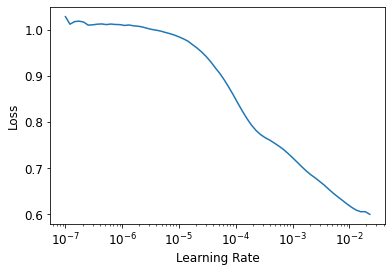

In [14]:
epoch = 100
lr = learn.lr_find()[0]
print('Learning rate is now', lr)
learn.fit_one_cycle(epoch, lr, wd=1)

In [23]:
mse = 0.237572
R2 = 1 - mse
R2

0.762428

In [24]:
learn.show_results()

,land_cover,city_id,night,road_len,city_pop,cen_dist,X,Y,population,population_pred
0,3.0,8.0,1.244122,-0.185666,0.342413,-1.289261,0.189797,0.220399,0.192004,0.133003
1,7.0,9.0,-0.821658,0.535551,0.135639,0.562310,1.673466,0.294105,0.533215,0.127670
2,2.0,20.0,0.741254,1.803655,0.058838,0.459105,-1.287416,-1.449391,1.272600,1.201707
3,8.0,3.0,0.382845,-0.328163,0.028746,1.068173,1.639983,-1.555606,0.673746,0.116083
4,8.0,16.0,0.293181,-2.160101,0.344915,-0.510811,0.873013,1.954244,-1.965020,-0.817898
5,7.0,15.0,1.050380,0.640546,0.225418,-1.461233,-0.313513,0.284209,0.320121,0.321043
6,2.0,13.0,1.183120,1.687919,0.159048,-1.397678,-0.271121,-0.822474,1.572982,1.549034
7,2.0,20.0,1.017487,2.012273,0.058838,-1.045304,-0.117844,-0.560671,1.209348,1.298743
8,7.0,12.0,-0.466633,-0.006799,1.000000,1.746925,-1.917040,-0.224004,-0.944207,-0.618406


In [25]:
learn.export(path + 'DL.pkl')
print('Model Saved!')

Model Saved!
